# Download the data

In [5]:
!rm -rf *
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv

--2023-11-22 00:55:51--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.test.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35145 (34K) [text/csv]
Saving to: ‘titanic.test.csv’

titanic.test.csv    100%[===================>]  34.32K   187KB/s    in 0.2s    

2023-11-22 00:55:52 (187 KB/s) - ‘titanic.test.csv’ saved [35145/35145]

--2023-11-22 00:55:52--  https://course.ccs.neu.edu/cs6220/fall2023/homework-7/data/titanic/titanic.train.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73203 (71K) [text/csv]
Saving to: ‘titanic.train.csv’

titanic.train.csv   100%[===================>]  71.49K   197KB/s    in 0.4s    

2023-11-22 00:55:53

# Read CVS files



In [6]:
!ls

titanic.test.csv  titanic.train.csv


In [7]:
import pandas as pd

df_test = pd.read_csv("titanic.test.csv")
print("test data")
df_test

df_train = pd.read_csv("titanic.train.csv")
print("train data")
df_train

test data
train data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,11,NaN,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI"
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,8,NaN,"Isleworth, England"
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.9500,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5000,B69,S,NaN,307.0,"Montreal, PQ"
887,3,1,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,NaN
888,3,0,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN
889,3,0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN


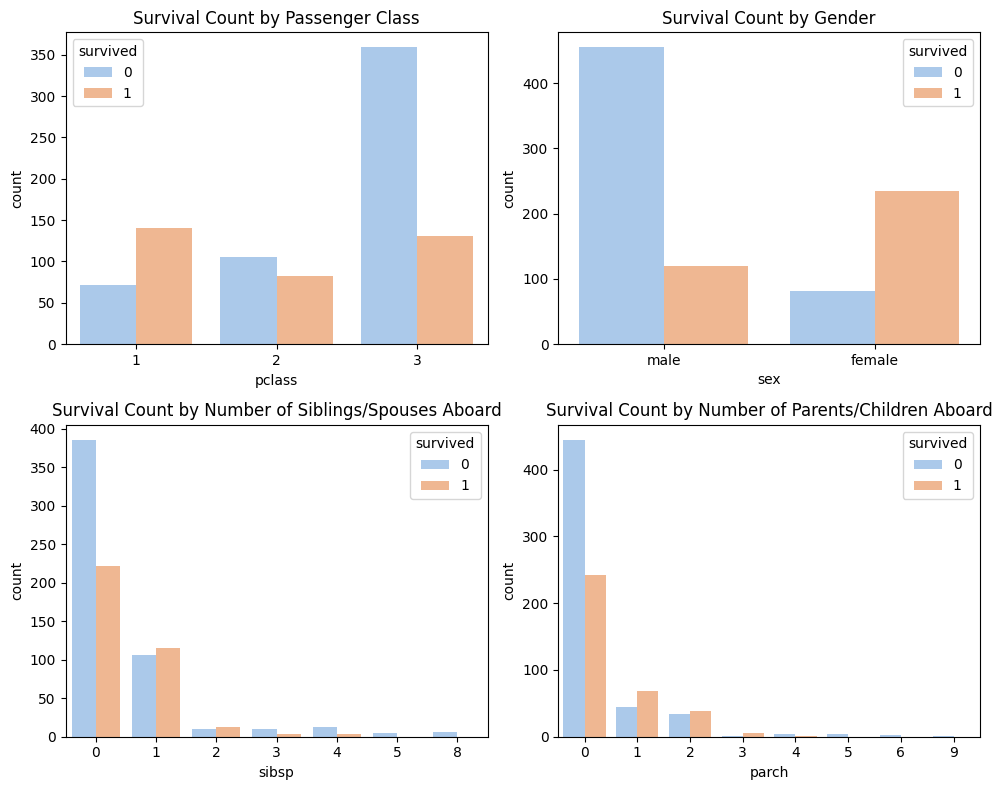

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plots for categorical features
# Survival (0 = No; 1 = Yes)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

sns.countplot(x='pclass', hue='survived', data=df_train, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Survival Count by Passenger Class')

sns.countplot(x='sex', hue='survived', data=df_train, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Survival Count by Gender')

sns.countplot(x='sibsp', hue='survived', data=df_train, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Survival Count by Number of Siblings/Spouses Aboard')

sns.countplot(x='parch', hue='survived', data=df_train, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Survival Count by Number of Parents/Children Aboard')

plt.tight_layout()
plt.show()

In [9]:
p_class = {1: 0, 2: 0, 3: 0}
count_pclass_one = 0
count_pclass_two = 0
count_pclass_three = 0

for index, row in df_train.iterrows():
    c = row['pclass']
    s = row['survived']

    # Count the number of occurrences for each passenger class
    if c == 1:
        count_pclass_one += 1
        if s == 1:
            p_class[c] += 1
    elif c == 2:
        count_pclass_two += 1
        if s == 1:
            p_class[c] += 1
    elif c == 3:
        count_pclass_three += 1
        if s == 1:
            p_class[c] += 1


# Calculate survival rate for each passenger class
passenger_class_one = p_class[1] / count_pclass_one if count_pclass_one != 0 else 0
passenger_class_two = p_class[2] / count_pclass_two if count_pclass_two != 0 else 0
passenger_class_three = p_class[3] / count_pclass_three if count_pclass_three != 0 else 0

print(f'Survival rate for Passenger Class 1: {passenger_class_one:.2%}')
print(f'Survival rate for Passenger Class 2: {passenger_class_two:.2%}')
print(f'Survival rate for Passenger Class 3: {passenger_class_three:.2%}')

Survival rate for Passenger Class 1: 66.51%
Survival rate for Passenger Class 2: 43.92%
Survival rate for Passenger Class 3: 26.73%


In [10]:
gender = {"male": 0, "female": 0}
count_male = 0
count_female = 0

for index, row in df_train.iterrows():
    c = row['sex']
    s = row['survived']

    # Count the number of occurrences for each gender
    if c == "male":
        count_male += 1
        if s == 1:
            gender[c] += 1
    elif c == "female":
        count_female += 1
        if s == 1:
            gender[c] += 1

# Calculate survival rate for each passenger class
male = gender["male"] / count_male if count_male != 0 else 0
female = gender["female"] / count_female if count_female != 0 else 0

print(f'Survival rate for Male: {male:.2%}')
print(f'Survival rate for Female: {female:.2%}')

Survival rate for Male: 20.87%
Survival rate for Female: 74.37%


# Sigmoid Function

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def gradsigmoid(x):
  return sigmoid * (1 - sigmoid(x))

# Logistic Regression

Logistic regression uses this function:

$$\hat{\textbf{y}} = \sigma ( W \textbf{x} + \textbf{b} )$$

The parameters that you need to optimize for are $W \in \mathbb{R}^{m \times d}$, a matrix of size $m \times d$ and $b \in \mathbb{R}^{m}$, a vector of size $m$.

In [12]:
def logreg(W, x, b):
  return sigmoid( (W @ x.T).T + b)

## Cross-Entropy Cost Function

Cross-Entropy Cost Function is defined as:

$$L( \{(\textbf{x}, \textbf{y}) \}, W, \textbf{b}) = - \sum_i \textbf{y}^{(i)T} \log \hat{\textbf{y}}^{(i)} + (1 - \textbf{y})^{(i) T} \log (1 - \hat{\textbf{y}}^{(i)})$$

Here,

$$\hat{\textbf{y}} = \sigma ( W \textbf{x} + \textbf{b} )$$

which is the logistic regression previously defined.


## Gradient of Cross-Entropy with respect to $W$

$$\nabla_W L =  \sum_i \left( \sigma ( W \textbf{x}^{(i)} + \textbf{b} ) - \textbf{y}^{(i)} \right) \textbf{x}^{(i) T}$$

This should yield a matrix $\mathbb{R}^{m \times d}$, where $m$ is the length of a label and $d$ is the length of a feature vector. If $\hat{\textbf{y}}$ is the prediction, then

$$\nabla_W L =  \sum_i \left( \hat{\textbf{y}}^{(i)} - \textbf{y}^{(i)} \right) \textbf{x}^{(i) T}$$

## Gradient of Cross-Entropy with respect to $b$

$$\nabla_b L =  \sum_i \left( \sigma ( W \textbf{x}^{(i)} + \textbf{b} ) - \textbf{y}^{(i)} \right)$$

This should yield a matrix $\mathbb{R}^{m}$, where $m$ is the length of a label. If $\hat{\textbf{y}}$ is the prediction, then

$$\nabla_b L =  \sum_i \left( \hat{\textbf{y}}^{(i)} - \textbf{y}^{(i)} \right)$$

## Naming convention of dimensions

* $N$ is the number of data samples (or batch size)
* $m$ is the number of labels
* $d$ is the number of features
* $W$ is the weight matrix of size $m \times d$
* $b$ is the offset vector of size $m$

In [13]:
def costfxn(y, W, x, b):
  '''
  Calculate the overall binary cross-entropy cost function

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offsite vector

  Returns:
    * A scalar cost value (summed over all data in the batch)
  '''
  yhat = logreg(W, x, b)
  return -np.sum( y * np.log(yhat) + ( 1 - y ) * np.log(1 - yhat) )


def gradW(y, W, x, b):
  '''
  Calculate the gradient w/r/t W

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offsite vector

  Returns:
    * gradient of size m x d
  '''
  yhat = logreg(W, x, b)
  return (np.expand_dims(yhat - y, 2) * np.expand_dims(x, 1)).sum(axis=0)

def gradb(y, W, x, b):
  '''
  Calculate the gradient w/r/t b

  Args:
    * y: N x m matrix
    * W: m x d matrix
    * x: N x d matrix of data
    * b: m offset vector

  Returns:
    * gradient of size N x m
  '''
  yhat = logreg(W, x, b)
  return (yhat - y).sum(axis=0)

# 1. Logistic Regression and Accuracy

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X_train = df_train.drop(['survived'], axis=1)
y_train = df_train['survived']

X_test = df_test.drop(['survived'], axis=1)
y_test = df_test['survived']

# Customize this part based on the selected features you want to include
X_train = X_train[['age', 'sex', 'pclass', 'sibsp', 'parch']]
X_test = X_test[['age', 'sex', 'pclass', 'sibsp', 'parch']]

# Replace categorical values with numerical labels if needed
# For simplicity, assuming binary encoding for 'sex' (assuming it's binary)
X_train['sex'] = X_train['sex'].map({'male': 0, 'female': 1})
X_train['age'] = X_train['age'].fillna(X_train['age'].mean())

X_test['sex'] = X_test['sex'].map({'male': 0, 'female': 1})
X_test['age'] = X_test['age'].fillna(X_train['age'].mean())


# One-hot encode 'sibsp' and 'parch'
# sibsp_cols = ['sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8']
# parch_cols = ['parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5', 'parch_6', 'parch_9']
# age_cols = ['age_0', 'age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80', 'age_90', 'age_100']
# X_train = pd.get_dummies(X_train, columns=['sibsp', 'parch'], prefix=['sibsp', 'parch'])
# X_test = pd.get_dummies(X_test, columns=['sibsp', 'parch'], prefix=['sibsp', 'parch'])

# Define age bins and labels
# age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# age_labels = [f'age_{i}' for i in range(0, 101, 10)]
# print(age_labels[:-1])

# # Apply one-hot encoding to 'age' column
# X_train['age'] = pd.cut(X_train['age'], bins=age_bins, labels=age_labels[:-1], right=False)
# X_test['age'] = pd.cut(X_test['age'], bins=age_bins, labels=age_labels[:-1], right=False)

# # Perform one-hot encoding on 'age' column
# X_train = pd.get_dummies(X_train, columns=['age'], prefix=['age'])
# X_test = pd.get_dummies(X_test, columns=['age'], prefix=['age'])

y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

# normalize features
def min_max_scale(feature):
    min_val = feature.min()
    max_val = feature.max()
    scaled_feature = (feature - min_val) / (max_val - min_val)
    return scaled_feature

# Apply min-max scaling to each feature
for column in X_train.columns:
    X_train[column] = min_max_scale(X_train[column])

for column in X_test.columns:
    X_test[column] = min_max_scale(X_test[column])

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions using threshold of 0.5
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate accuracy
train_accuracy = np.sum(train_preds == y_train) / len(y_train)
test_accuracy = np.sum(test_preds == y_test) / len(y_test)

# Print accuracies and cost
print(f"Training Accuracy with threshold of 0.5: {train_accuracy:.2%}")
print(f"Test Accuracy with threshold of 0.5: {test_accuracy:.2%}")

Training Accuracy with threshold of 0.5: 78.00%
Test Accuracy with threshold of 0.5: 80.14%


# Optimize with Gradient Descent

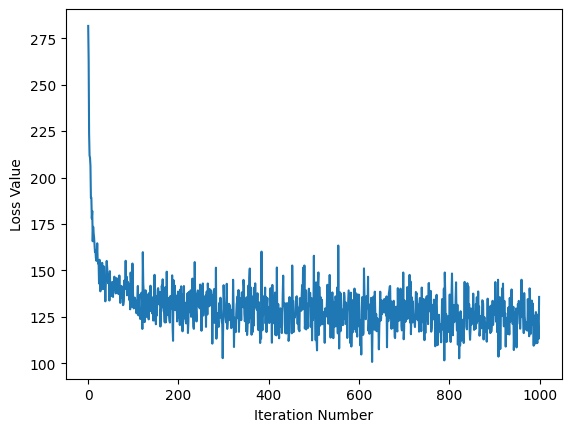

In [15]:
# Parameters
num_iters = 1000
batch_size = 256
learn_rate = 0.001
random_range = np.random.default_rng(len(X_train))

# Randomly initialize weights and bias
num_features = X_train.shape[1]
num_labels = 1

W = np.random.randn(num_labels, num_features)
b = np.random.randn(num_labels)

# Iterate through num_iters
L = []
for i in range(num_iters):
    # Take a random training sample
    rand_sample = random_range.integers(low=0, high=len(X_train), size=batch_size)

    # Features
    xtrain_batch = X_train.iloc[rand_sample].values
    ytrain_batch = y_train.iloc[rand_sample].values.reshape(-1, 1)

    # Calculate cost function and the gradient
    gradient_W = gradW(ytrain_batch, W, xtrain_batch, b)
    gradient_b = gradb(ytrain_batch, W, xtrain_batch, b)

    # Update weights and bias
    W -= learn_rate * gradient_W
    b -= learn_rate * gradient_b

    # Calculate the cost function
    cost = costfxn(ytrain_batch, W, xtrain_batch, b)
    L.append(cost)

yhat = logreg(W, xtrain_batch, b)
# Plot the loss curve
plt.plot(L)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Value')
plt.show()

# 2. Using a toolbox (like Keras), try benchmarking your logistic regression and then adding a few more layers (i.e., a neural network). Diagram your neural network architecture and print out your overall test set accuracy. Make sure you do not train on any samples from your test set.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a neural network model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_dim=num_features))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Diagram my neural network architecture

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/15
4/4 [==============================] - 2s 115ms/step - loss: 0.6875 - accuracy: 0.6004 - val_loss: 0.6689 - val_accuracy: 0.6531
Epoch 2/15
4/4 [==============================] - 0s 21ms/step - loss: 0.6672 - accuracy: 0.6745 - val_loss: 0.6485 - val_accuracy: 0.7368
Epoch 3/15
4/4 [==============================] - 0s 16ms/step - loss: 0.6483 - accuracy: 0.7116 - val_loss: 0.6287 - val_accuracy: 0.7871
Epoch 4/15
4/4 [==============================] - 0s 22ms/step - loss: 0.6308 - accuracy: 0.7654 - val_loss: 0.6101 - val_accuracy: 0.7990
Epoch 5/15
4/4 [==============================] - 0s 34ms/step - loss: 0.6140 - accuracy: 0.7755 - val_loss: 0.5931 - val_accuracy: 0.7990
Epoch 6/15
4/4 [==============================] - 0s 31ms/step - loss: 0.5990 - accuracy: 0.7755 - val_loss: 0.5767 - val_accuracy: 0.7990
Epoch 7/15
4/4 [==============================] - 0s 17ms/step - loss: 0.5843 - accuracy: 0.7755 - val_loss: 0.5602 - val_accuracy: 0.7990
Epoch 8/15
4/4 [==========

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=256)
print(f"Test loss with Neural Network: {test_loss:.5%}")
print(f"Test Accuracy with Neural Network: {test_accuracy:.2%}")

2/2 [==============================] - 0s 8ms/step - loss: 0.4633 - accuracy: 0.7967
Test loss with Neural Network: 46.32587%
Test Accuracy with Neural Network: 79.67%
